# 1.Load Data

In [1]:
# Import library
import pandas as pd
import numpy as np
from IPython.display import display

# load the data set
df = pd.read_csv('Data set 1 (12 KB) - heart_disease.csv')

# Display the first few rows of the dataset
display(df.head())
print('\n')

# Get summary of numerical variables
# describe() function would provide count, mean, standard deviation (std), min, quartiles and max in its output
display(df.describe())
print('\n')

# Check the number of null in the dataset
display(df.apply(lambda x: sum(x.isnull()),axis=0)) 
print('\n')

# Show the types of data
display(df.dtypes) 
print('\n')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# 2.Feature Selection

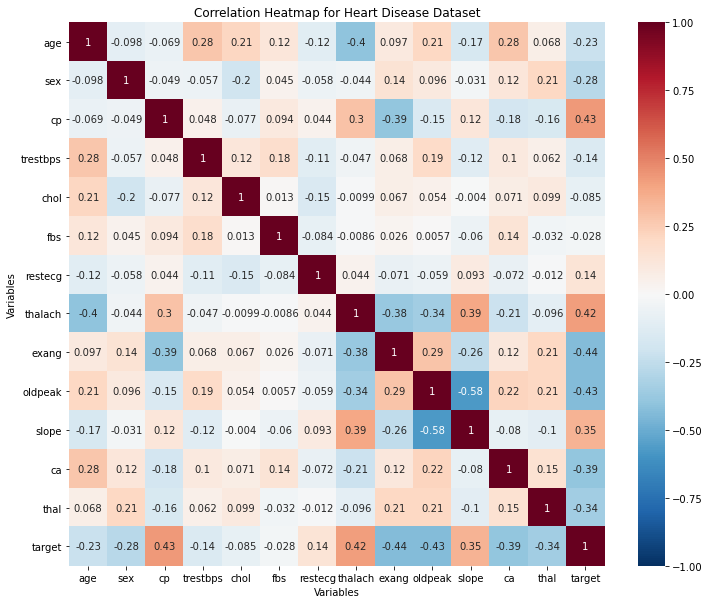

In [2]:
# Import library
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="RdBu_r", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Heart Disease Dataset")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

In [3]:
# Import libraries
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Change negative values to non negative values by taking absolute value
X = np.abs(X)

# Create an instance of SelectKBest with chi2 as the score function
selector = SelectKBest(chi2, k=10)

# Fit and transform the data
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]

# Get the scores of the features
scores = selector.scores_

# Get the indices of the sorted scores
indices = np.argsort(scores)[::-1]

# Print the features and their scores in descending order
print("Features and scores:")
for i in indices:
    print(f"{X.columns[i]:10} {scores[i]:.6f}")

Features and scores:
thalach    188.320472
oldpeak    72.644253
ca         66.440765
cp         62.598098
exang      38.914377
chol       23.936394
age        23.286624
trestbps   14.823925
slope      9.804095
sex        7.576835
thal       5.791853
restecg    2.978271
fbs        0.202934


### Based on the feature selection, we will use ['thalach','oldpeak','ca','cp','exang','chol','age]

# 3.Build the machine learning model
## a) Decision Tree

### Hyparameter tuning

In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Load dataset from csv file
df = pd.read_csv('Data set 1 (12 KB) - heart_disease.csv')

# Define features and target variables
X = df.drop('target', axis=1) # features
y = df['target'] # target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier object
dt = DecisionTreeClassifier(random_state=42)

# Define a parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'], # splitting criterion
    'max_depth': [1, 2, 3, 4], # maximum depth of the tree
    'min_samples_split': [6, 7, 8, 9], # minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3, 4] # minimum number of samples required to be at a leaf node
}

# Create a grid search object
gs = GridSearchCV(dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search object to the training data
gs.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters:', gs.best_params_)
print('Best score:', gs.best_score_)

# Predict on the test set using the best model
y_pred = gs.predict(X_test)

# Print the test accuracy score
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Print the cross-validation score using the best model
print('Cross-validation score:', cross_val_score(gs.best_estimator_, X, y, cv=5).mean())

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 6}
Best score: 0.8300110741971206
Test accuracy: 0.7252747252747253
Cross-validation score: 0.7685792349726777


In [5]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # For classification
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv("Data set 1 (12 KB) - heart_disease.csv")
feature=['thalach','oldpeak','ca','cp','exang','chol','age']
X1 = data[feature]
y1 = data["target"]

# Split data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Choose criterion and max_depth parameters
criterion = "gini"
max_depth = 4

# Create and fit Decision Tree model
# For classification
dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,random_state=42,min_samples_leaf=4, min_samples_split=6)
dt.fit(X1_train, y1_train)

# Make predictions on test set
y1_pred = dt.predict(X1_test)

In [6]:
# Evaluate the model's performance using various metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y1_test, y1_pred))
print ('Recall:', recall_score(y1_test, y1_pred, average="weighted"))
print ('Precision:', precision_score(y1_test, y1_pred, average="weighted"))
f1 = f1_score(y1_test, y1_pred, average="weighted")
print("F1 Score:", f1)
confusion = confusion_matrix(y1_test, y1_pred)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8351648351648352
Recall: 0.8351648351648352
Precision: 0.8375235875235877
F1 Score: 0.833737690880548
Confusion matrix:
[[31 10]
 [ 5 45]]


## b) Support Vector Machine

### Hyperparameter tuning

In [7]:
# Importing the libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Loading the data set
data = pd.read_csv("Data set 1 (12 KB) - heart_disease.csv")

# Splitting the data into features and target
X = data.drop("target", axis=1)
y = data["target"]

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Defining the parameter space for SVM
param_grid = {
    "C": [0.1, 1, 10, 100], # regularization parameter
    "kernel": ["linear", "rbf", "poly", "sigmoid"], # kernel type
    "gamma": ["scale", "auto", 0.1, 0.01, 0.001] # kernel coefficient for rbf, poly and sigmoid
}

# Creating an SVM estimator
svc = SVC(random_state=42)

# Creating a grid search object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring="accuracy", verbose=True) # use verbose the see whether the code is running as the hyperparameter tuning for SVM takes a lot of time

# Fitting the grid search on the data
grid_search.fit(X, y)

# Printing the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.8316393442622951


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    3.6s finished


In [8]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC # For classification
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv("Data set 1 (12 KB) - heart_disease.csv")
feature=['thalach','oldpeak','ca','cp','exang','chol','age']
X2 = data[feature]
y2 = data["target"]

# Split data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Create and fit SVM model
# For classification
svm = SVC(C=1, gamma="scale", kernel="linear")
svm.fit(X2_train, y2_train)

# Make predictions on test set
y2_pred = svm.predict(X2_test)

In [9]:
# Evaluate the model's performance using various metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y2_test, y2_pred))
print ('Recall:', recall_score(y2_test, y2_pred, average="weighted"))
print ('Precision:', precision_score(y2_test, y2_pred, average="weighted"))
f1 = f1_score(y2_test, y2_pred, average="weighted")
print("F1 Score:", f1)
confusion = confusion_matrix(y2_test, y2_pred)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8241758241758241
Recall: 0.8241758241758241
Precision: 0.8282104369060891
F1 Score: 0.8246017548343129
Confusion matrix:
[[35  6]
 [10 40]]


## c) K-Nearest Neighbours

### Hyperparameter tuning

In [10]:
# Importing the libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Loading the data set
data = pd.read_csv("Data set 1 (12 KB) - heart_disease.csv")

# Splitting the data into features and target
X = data.drop("target", axis=1)
y = data["target"]

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Defining the parameter space for k-NN
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11, 17], # number of neighbors
    "metric": ["euclidean", "manhattan", "minkowski"] # distance metric
}

# Creating a k-NN estimator
knn = KNeighborsClassifier()

# Creating a grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")

# Fitting the grid search on the data
grid_search.fit(X, y)

# Printing the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 9}
Best score: 0.8281967213114754


#### After we done the hyperparameter tuning we found that the k value for KNN algorithm is 9 which is different with the square root of N that gets 17. So we decide to use 17 as our K value because it got higher accuracy compare 9.

In [11]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # For classification
from sklearn.model_selection import train_test_split
import math
import csv

# Load data
data = pd.read_csv("Data set 1 (12 KB) - heart_disease.csv")
feature=['thalach','oldpeak','ca','cp','exang','chol','age']
X3 = data[feature]
y3 = data["target"]

# Split data into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Choose k value
rowcount = 0
for row in open("Data set 1 (12 KB) - heart_disease.csv"):
    rowcount+= 1
print("Number of lines present:", rowcount)

k=int(math.sqrt(rowcount-1))
print(k)

# Create and fit KNN model
# For classification
knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
knn.fit(X3_train, y3_train)

# Make predictions on test set
y3_pred = knn.predict(X3_test)

Number of lines present: 304
17


In [12]:
# Evaluate the model's performance using various metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y3_test, y3_pred))
print ('Recall:', recall_score(y3_test, y3_pred, average="weighted"))
print ('Precision:', precision_score(y3_test, y3_pred, average="weighted"))
f1 = f1_score(y3_test, y3_pred, average="weighted")
print("F1 Score:", f1)
confusion = confusion_matrix(y3_test, y3_pred)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.7252747252747253
Recall: 0.7252747252747253
Precision: 0.7247791424262012
F1 Score: 0.7249389163580583
Confusion matrix:
[[28 13]
 [12 38]]
